<a href="https://www.kaggle.com/code/htonmoy19/mobile-phone-price-analysis?scriptVersionId=194862390" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('/kaggle/input/mobile-phone-price-prediction/mobile phone price prediction.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [3]:
ddf = raw_data.to_csv('mobile-phone-price.csv', index=False)

In [4]:
data = raw_data.drop('Unnamed: 0', axis=1)
data.describe(include='all')


,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
count,1370,1370.000000,1370.000000,1370,1370,1370,1370,1370,1370,927,1370,1370,1351,1281,1368,1342,1370
unique,1334,NaN,NaN,9,16,89,89,347,85,23,449,26,10,38,141,14,276
top,Realme Narzo N55 (6GB RAM + 128GB),NaN,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,5000 mAh Battery,6.7 inches,50 MP + 2 MP Dual Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"29,990",Vivo,128 GB inbuilt,18W Fast Charging,1080 x 2400 px,Octa Core,Snapdragon 8+ Gen1
freq,3,NaN,NaN,818,528,693,158,81,233,280,37,186,644,157,357,1237,58
mean,NaN,4.374416,80.234307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.230176,8.373922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3.750000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.150000,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.400000,82.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.550000,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['Price'] = data['Price'].str.replace(',', '').astype(float)

In [6]:
data.describe(include='all')

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
count,1370,1370.000000,1370.000000,1370,1370,1370,1370,1370,1370,927,1370.000000,1370,1351,1281,1368,1342,1370
unique,1334,NaN,NaN,9,16,89,89,347,85,23,NaN,26,10,38,141,14,276
top,Realme Narzo N55 (6GB RAM + 128GB),NaN,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,5000 mAh Battery,6.7 inches,50 MP + 2 MP Dual Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",13,NaN,Vivo,128 GB inbuilt,18W Fast Charging,1080 x 2400 px,Octa Core,Snapdragon 8+ Gen1
freq,3,NaN,NaN,818,528,693,158,81,233,280,NaN,186,644,157,357,1237,58
mean,NaN,4.374416,80.234307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33436.740876,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.230176,8.373922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30452.065430,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3.750000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6950.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.150000,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12990.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.400000,82.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21999.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.550000,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42990.000000,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Rating', ylabel='company'>

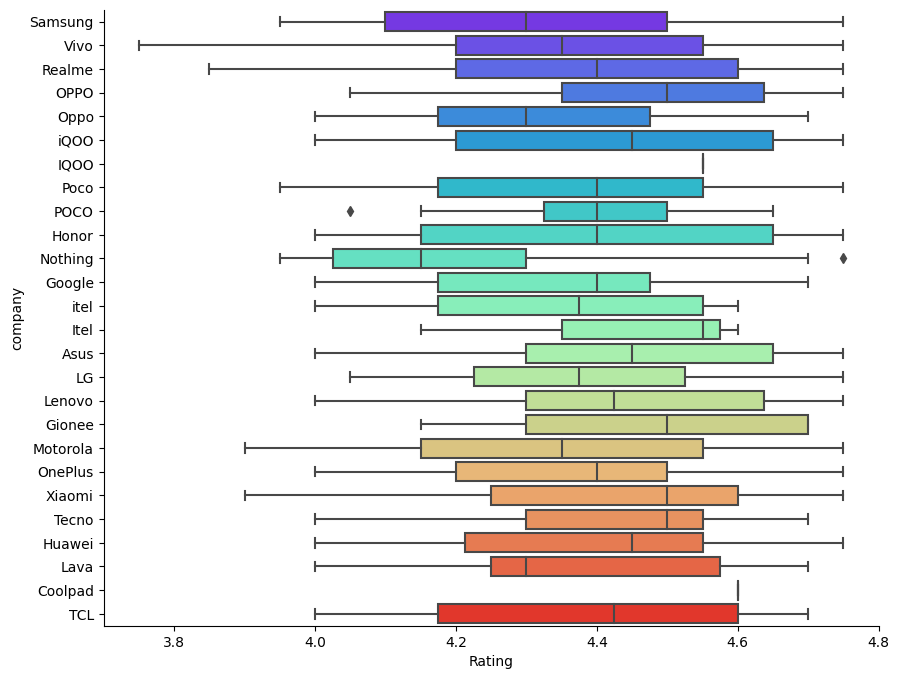

In [7]:
f, ax = plt.subplots(figsize=(10,8))
sns.despine(f)
sns.boxplot(data=data, x='Rating', y='company',palette='rainbow', orient='h')

In [8]:
data['company'] = data['company'].str.lower()
data['company'].value_counts()

company
vivo        186
realme      186
samsung     181
motorola    127
poco         94
xiaomi       90
honor        88
oneplus      75
oppo         65
huawei       62
iqoo         58
tcl          26
google       23
asus         21
lava         19
itel         15
nothing      15
lenovo       14
tecno        13
lg            6
gionee        5
coolpad       1
Name: count, dtype: int64

<Axes: xlabel='Price', ylabel='company'>

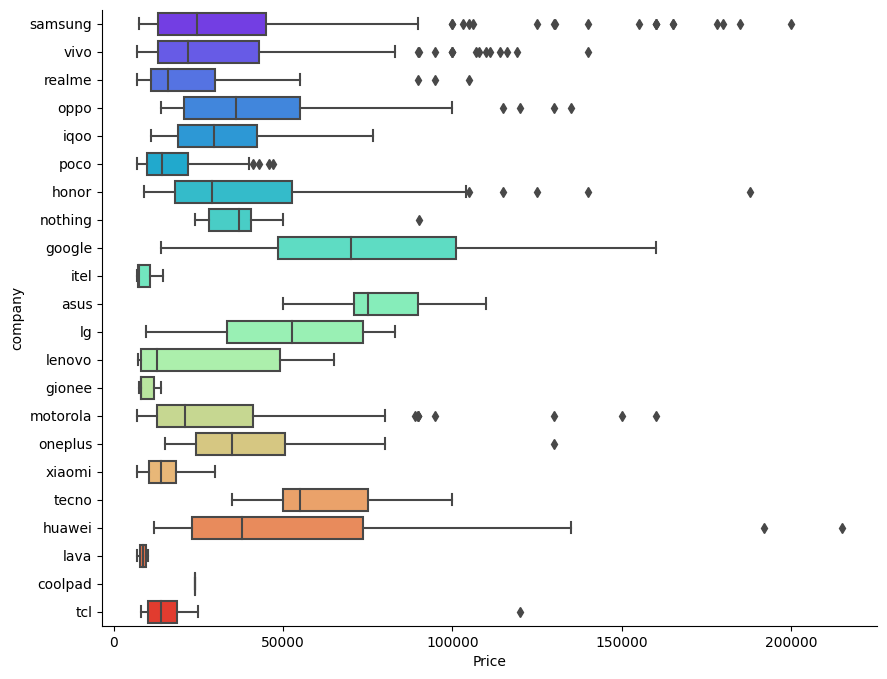

In [9]:
f, ax = plt.subplots(figsize=(10,8))
sns.despine(f)
sns.boxplot(data=data, x='Price', y='company',palette='rainbow', orient='h')

<Axes: xlabel='Spec_score', ylabel='Price'>

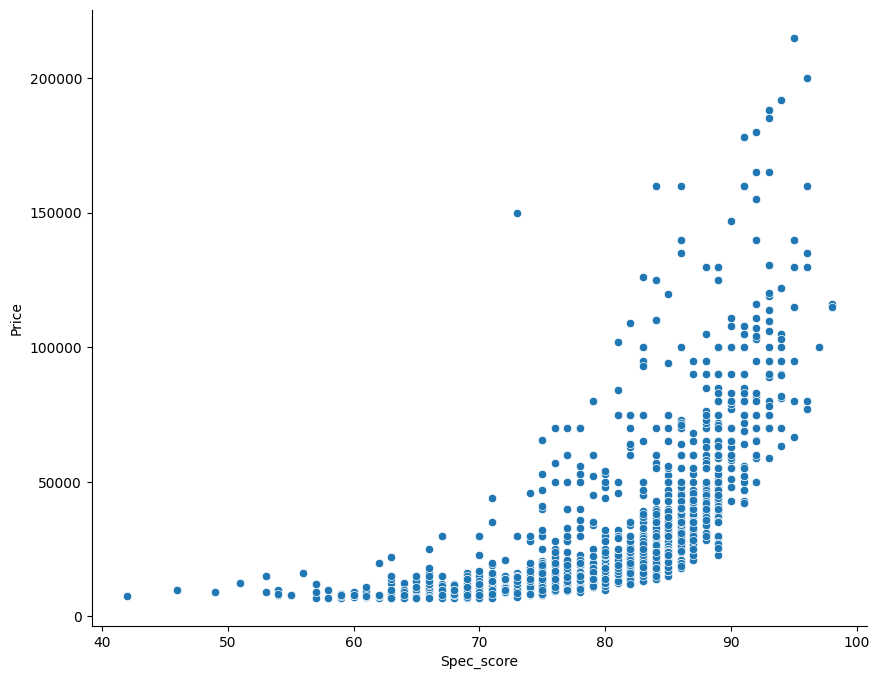

In [10]:
f, ax = plt.subplots(figsize=(10,8))
sns.despine(f)
sns.scatterplot(data=data, x='Spec_score', y='Price')

In [11]:
data.Processor_name.value_counts()

Processor_name
Snapdragon 8+ Gen1    58
Snapdragon 8 Gen2     55
Snapdragon 8 Gen3     44
Snapdragon 695        36
Snapdragon 680        34
                      ..
Dimensity 8000         1
Dimensity  1100        1
Dimensity 920          1
Snapdragon  765G       1
Helio A25              1
Name: count, Length: 276, dtype: int64

In [12]:
data.Processor.value_counts()

Processor
Octa Core              1237
Octa Core Processor      75
Quad Core                11
1.6 GHz Processor         3
Deca Core                 3
2 GHz Processor           2
Nine-Cores                2
Nine Core                 2
Nine Cores                2
1.8 GHz Processor         1
Deca Core Processor       1
1.3 GHz Processor         1
2.3 GHz Processor         1
128 GB inbuilt            1
Name: count, dtype: int64

<Axes: xlabel='Price', ylabel='Processor'>

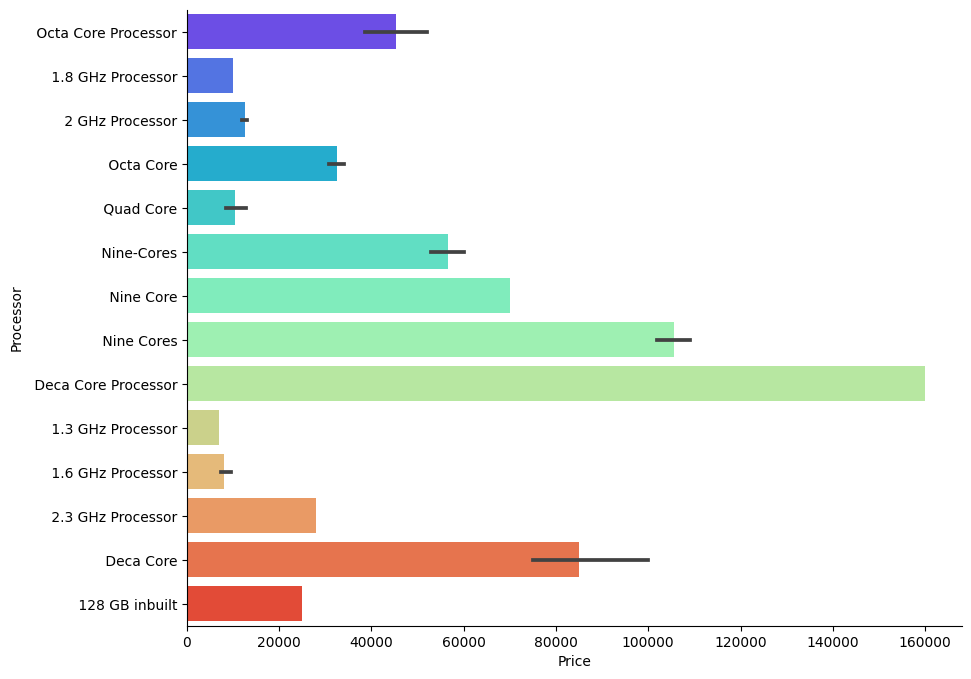

In [13]:
f, ax = plt.subplots(figsize=(10,8))
sns.despine(f)
sns.barplot(data=data, x='Price', y='Processor',palette='rainbow', orient='h')

In [14]:
data[(data['Price']>=140000) & (data['Spec_score']<=80)]

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
1052,Motorola Razr 2019,4.25,73,"Single Sim, 3G, 4G, VoLTE,",6 GB RAM,2510 mAh Battery,6.2 inches,Dual Display,16 MP Rear &amp; 5 MP Front Camera,NaN,149999.0,motorola,128 GB inbuilt,18W Fast Charging,876 x 2142 px Display with Large Notch,Octa Core,Snapdragon 710


<Axes: xlabel='Spec_score', ylabel='Price'>

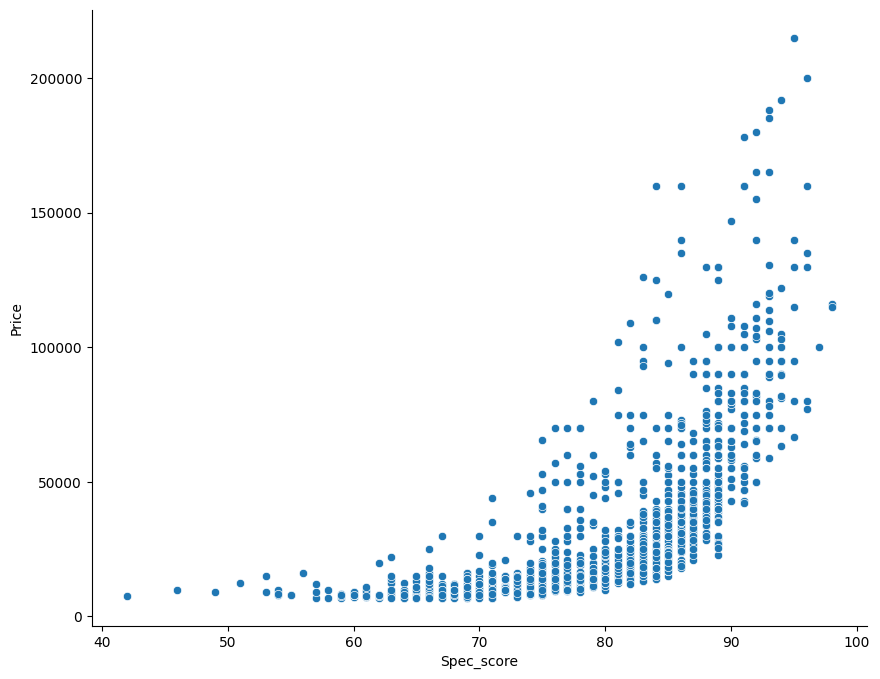

In [15]:
# droping the 'Motorola Razr 2019' as outlier
data1 = data.drop(index=1052)
f, ax = plt.subplots(figsize=(10,8))
sns.despine(f)
sns.scatterplot(data=data1, x='Spec_score', y='Price')


In [16]:
# let's check the higher priced phone
data.sort_values(by=['Price'], ascending=False).head(10)

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
1279,Huawei Mate 30 RS Porsche Design,4.15,95,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,4500 mAh Battery,6.53 inches,40 MP Quad Rear &amp; 32 MP Dual Front Camera,"Memory Card (Hybrid), upto 256 GB",10,214990.0,huawei,512 GB inbuilt,Fast Charging,1176 x 2400 px Display with Large Notch,Octa Core,Kirin 990
76,Samsung Galaxy Z Fold 6 Ultra,4.05,96,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G,",12 GB RAM,5000 mAh Battery,8.2 inches,"Foldable Display, Dual Display",200 MP Quad Rear &amp; 12 MP + 12 MP Dual Fron...,14,199990.0,samsung,256 GB inbuilt,80W Fast Charging,1812 x 2176 px,Octa Core,Snapdragon 8 Gen3
1287,Huawei Mate 40 RS Porsche Design,4.30,94,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,4400 mAh Battery,6.76 inches,50 MP Quad Rear &amp; 13 MP Dual Front Camera,"Memory Card (Hybrid), upto 256 GB",10,191999.0,huawei,512 GB inbuilt,66W Fast Charging,1344 x 2772 px Display,Octa Core,Kirin 9000
608,Honor Magic V2 RSR Porsche Design,4.75,93,"Dual Sim, 3G, 4G, 5G, VoLTE,",16 GB RAM,5000 mAh Battery,7.92 inches,"Foldable Display, Dual Display",50 MP + 50 MP + 20 MP Triple Rear &amp; 16 MP ...,13,187990.0,honor,1 TB inbuilt,66W Fast Charging,2156 x 2344 px,Octa Core,Snapdragon 8 Gen2
77,Samsung Galaxy Z Fold 5 (12GB RAM + 1TB),4.45,93,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G,",12 GB RAM,4400 mAh Battery,7.6 inches,"Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear &amp; 10 MP ...,13,184999.0,samsung,1 TB inbuilt,25W Fast Charging,1812 x 2176 px,Octa Core,Snapdragon 8 Gen 2
78,Samsung Galaxy Z Fold 6,4.45,92,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G,",12 GB RAM,4400 mAh Battery,8 inches,"Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear &amp; 12 MP ...,14,179990.0,samsung,256 GB inbuilt,25W Fast Charging,1812 x 2176 px,Octa Core,Snapdragon 8 Gen3
79,Samsung Galaxy Z Fold 4,4.75,91,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,4400 mAh Battery,7.6 inches,"Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear &amp; 10 MP ...,12,177999.0,samsung,256 GB inbuilt,25W Fast Charging,1812 x 2176 px,Octa Core,Snapdragon 8+ Gen1
80,Samsung Galaxy Z Fold 5 (12GB RAM + 512GB),4.05,93,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G,",12 GB RAM,4400 mAh Battery,7.6 inches,"Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear &amp; 10 MP ...,13,164999.0,samsung,512 GB inbuilt,25W Fast Charging,1812 x 2176 px,Octa Core,Snapdragon 8 Gen 2
81,Samsung Galaxy Z Fold 4 (12GB RAM + 512GB),4.35,92,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,4400 mAh Battery,7.6 inches,"Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear &amp; 10 MP ...,12,164999.0,samsung,512 GB inbuilt,25W Fast Charging,1812 x 2176 px,Octa Core,Snapdragon 8+ Gen1
82,Samsung Galaxy S24 Ultra (12GB RAM + 1TB),4.60,96,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G,",12 GB RAM,5000 mAh Battery,6.8 inches,200 MP Quad Rear &amp; 12 MP Front Camera,Memory Card Not Supported,14,159999.0,samsung,1 TB inbuilt,45W Fast Charging,1440 x 3120 px,Octa Core,Snapdragon 8 Gen3


In [17]:
data1.External_Memory.value_counts()

External_Memory
Memory Card Supported, upto 1 TB                                               233
Memory Card (Hybrid), upto 1 TB                                                161
Memory Card Not Supported                                                      142
Android v13                                                                    107
Android v12                                                                    104
                                                                              ... 
48 MP + 12 MP Dual Rear &amp; 10 MP Front Camera                                 1
48 MP + 10.8 MP + 10.8 MP Triple Rear &amp; 9.5 MP + 8 MP Dual Front Camera      1
50 MP + 10.8 MP + 10.8 MP Triple Rear &amp; 12 MP + 12 MP Dual Front Camera      1
Memory Card Supported, upto 32 GB                                                1
50 MP + 48 MP + 8 MP Triple Rear &amp; 32 MP Front Camera                        1
Name: count, Length: 84, dtype: int64

<Axes: xlabel='Price', ylabel='External_Memory'>

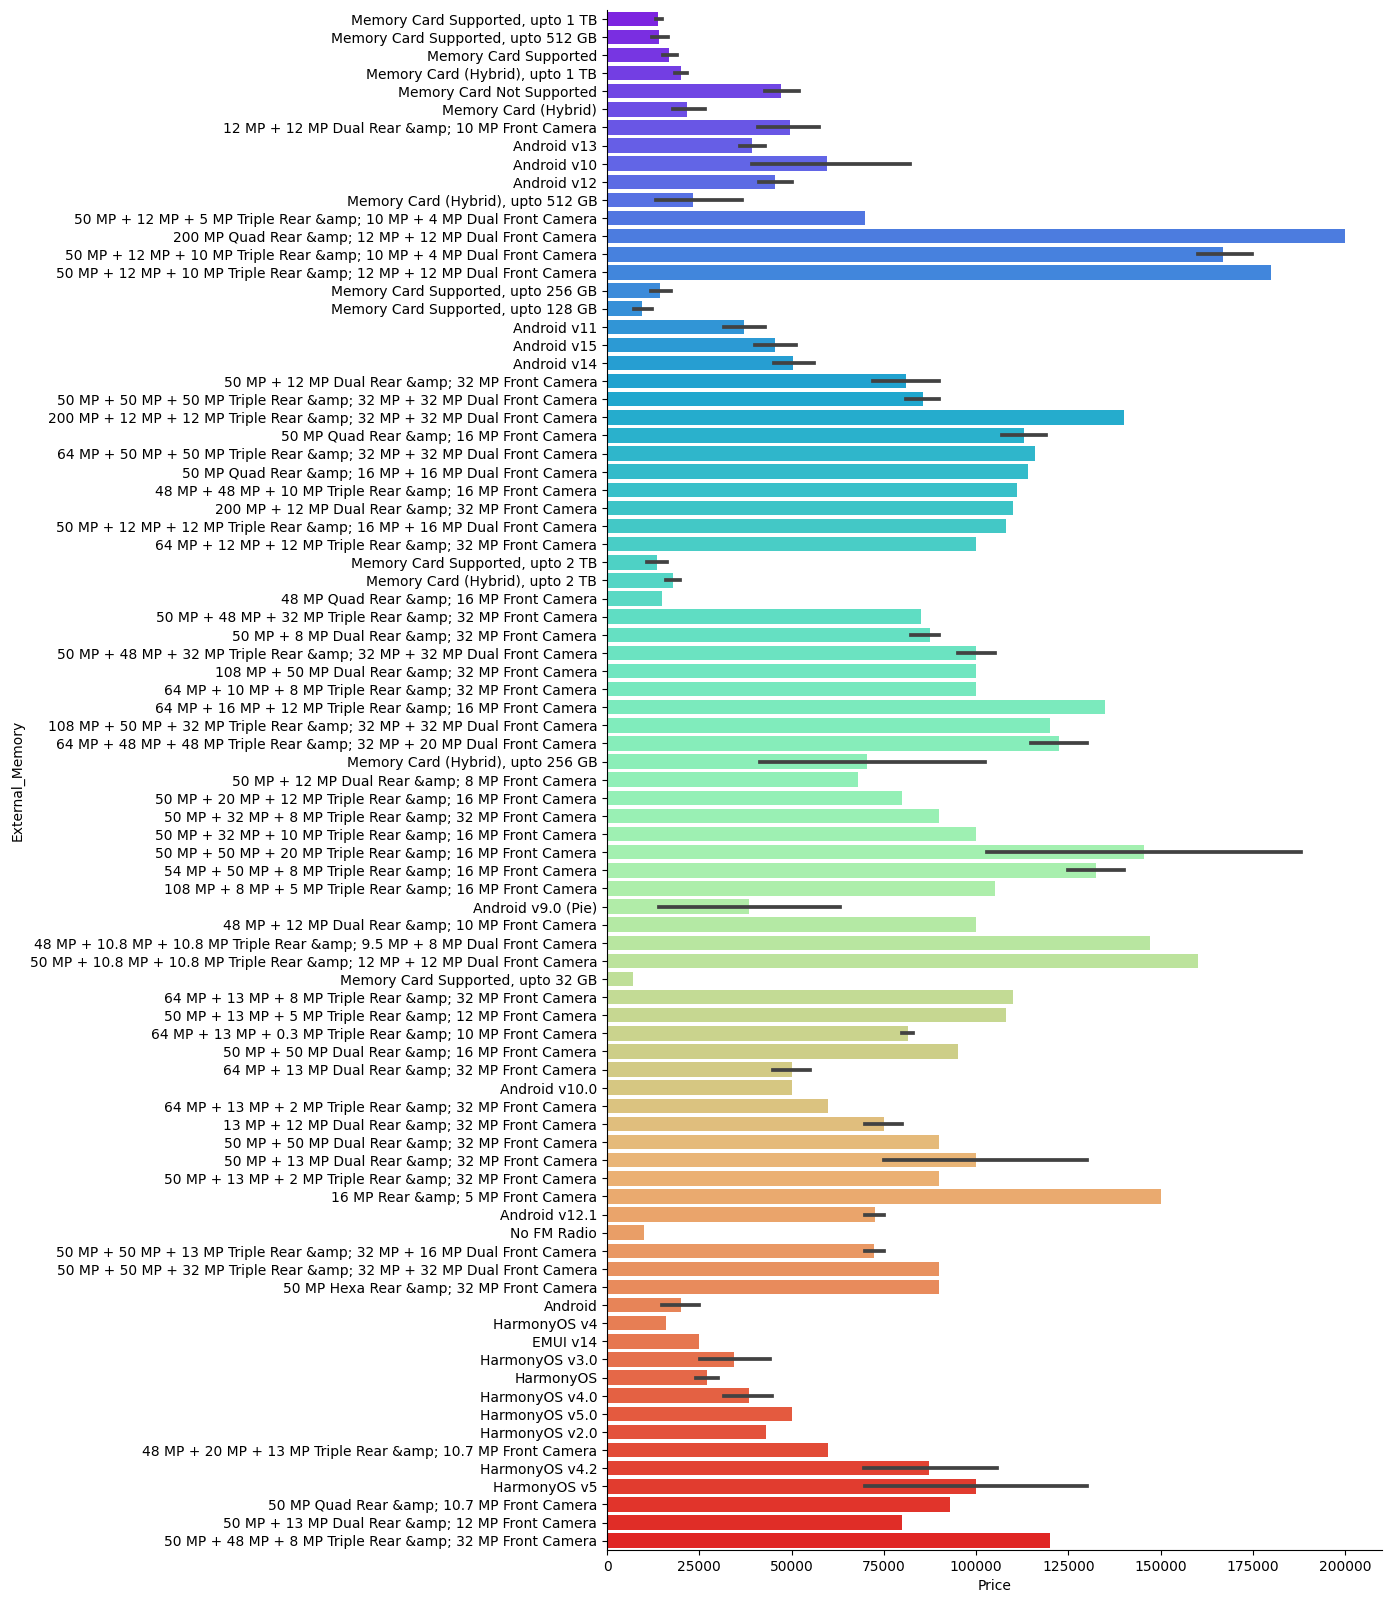

In [18]:
f, ax = plt.subplots(figsize=(10,20))
sns.despine(f)
sns.barplot(data=data, x='Price', y='External_Memory',palette='rainbow', orient='h')

In [19]:
data1.columns

Index(['Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram', 'Battery',
       'Display', 'Camera', 'External_Memory', 'Android_version', 'Price',
       'company', 'Inbuilt_memory', 'fast_charging', 'Screen_resolution',
       'Processor', 'Processor_name'],
      dtype='object')

In [20]:
data2 = data1.drop(['Name','No_of_sim', 'Camera','External_Memory','Android_version','Screen_resolution','Processor_name'],axis=1)
data2.head()

,Rating,Spec_score,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor
0,4.65,68,4 GB RAM,6000 mAh Battery,6.6 inches,9999.0,samsung,128 GB inbuilt,25W Fast Charging,Octa Core Processor
1,4.20,63,2 GB RAM,4000 mAh Battery,6.4 inches,9990.0,samsung,32 GB inbuilt,15W Fast Charging,1.8 GHz Processor
2,4.30,75,4 GB RAM,5000 mAh Battery,6.6 inches,11999.0,samsung,64 GB inbuilt,25W Fast Charging,2 GHz Processor
3,4.10,73,4 GB RAM,6000 mAh Battery,6.4 inches,11999.0,samsung,64 GB inbuilt,NaN,Octa Core
4,4.10,69,4 GB RAM,5000 mAh Battery,6.5 inches,11999.0,samsung,64 GB inbuilt,15W Fast Charging,Octa Core


In [21]:
data2.isnull().sum()

Rating             0
Spec_score         0
Ram                0
Battery            0
Display            0
Price              0
company            0
Inbuilt_memory    19
fast_charging     89
Processor         28
dtype: int64

In [22]:
data3 = data2.dropna(axis=0)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1236 entries, 0 to 1369
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          1236 non-null   float64
 1   Spec_score      1236 non-null   int64  
 2   Ram             1236 non-null   object 
 3   Battery         1236 non-null   object 
 4   Display         1236 non-null   object 
 5   Price           1236 non-null   float64
 6   company         1236 non-null   object 
 7   Inbuilt_memory  1236 non-null   object 
 8   fast_charging   1236 non-null   object 
 9   Processor       1236 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 106.2+ KB


In [23]:
data3.Ram.value_counts()

Ram
8 GB RAM     517
12 GB RAM    241
4 GB RAM     216
6 GB RAM     195
16 GB RAM     39
3 GB RAM      16
2 GB RAM       6
18 GB RAM      4
24 GB RAM      2
Name: count, dtype: int64

In [24]:
data4 = data3.copy()
data4['Ram'] = data4['Ram'].apply(lambda x : int(x.split(' ')[0]))
data4.head()

,Rating,Spec_score,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor
0,4.65,68,4,6000 mAh Battery,6.6 inches,9999.0,samsung,128 GB inbuilt,25W Fast Charging,Octa Core Processor
1,4.20,63,2,4000 mAh Battery,6.4 inches,9990.0,samsung,32 GB inbuilt,15W Fast Charging,1.8 GHz Processor
2,4.30,75,4,5000 mAh Battery,6.6 inches,11999.0,samsung,64 GB inbuilt,25W Fast Charging,2 GHz Processor
4,4.10,69,4,5000 mAh Battery,6.5 inches,11999.0,samsung,64 GB inbuilt,15W Fast Charging,Octa Core
5,4.40,75,6,5000 mAh Battery,6.5 inches,11990.0,samsung,128 GB inbuilt,15W Fast Charging,Octa Core


<Axes: xlabel='Price', ylabel='Ram'>

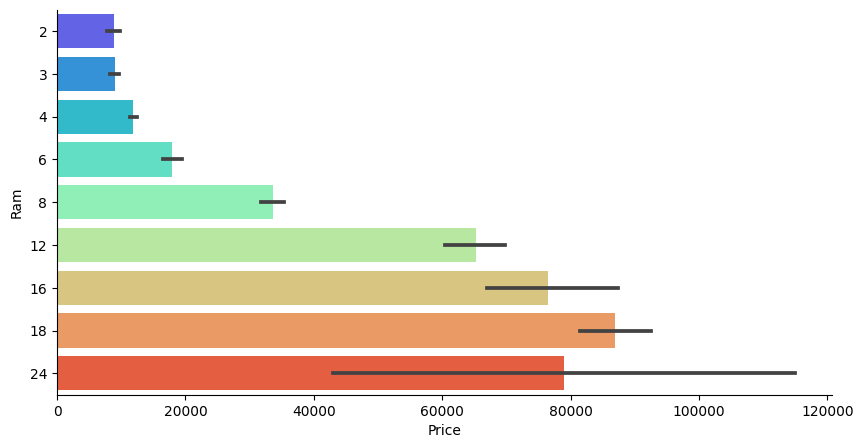

In [25]:
f, ax = plt.subplots(figsize=(10,5))
sns.despine(f)
sns.barplot(data=data4, x='Price', y='Ram',palette='rainbow', orient='h')

In [26]:
data4.Battery.value_counts()

Battery
5000 mAh Battery     677
4500 mAh Battery     111
6000 mAh Battery      96
4000 mAh Battery      35
4800 mAh Battery      32
                    ... 
4385 mAh Battery       1
4620 mAh Battery       1
3400 mAh Battery       1
5065 mAh Battery       1
4320 mAh Battery       1
Name: count, Length: 68, dtype: int64

In [27]:
data4['Battery'] = data4['Battery'].apply(lambda x: int(x.split(' ')[0]))
data4.head(5)

,Rating,Spec_score,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor
0,4.65,68,4,6000,6.6 inches,9999.0,samsung,128 GB inbuilt,25W Fast Charging,Octa Core Processor
1,4.20,63,2,4000,6.4 inches,9990.0,samsung,32 GB inbuilt,15W Fast Charging,1.8 GHz Processor
2,4.30,75,4,5000,6.6 inches,11999.0,samsung,64 GB inbuilt,25W Fast Charging,2 GHz Processor
4,4.10,69,4,5000,6.5 inches,11999.0,samsung,64 GB inbuilt,15W Fast Charging,Octa Core
5,4.40,75,6,5000,6.5 inches,11990.0,samsung,128 GB inbuilt,15W Fast Charging,Octa Core


In [28]:
data4.Display.value_counts()

Display
6.7 inches     151
6.67 inches    142
6.78 inches    137
6.5 inches      93
6.6 inches      88
              ... 
6.34 inches      1
5.7 inches       1
5.6 inches       1
12.1 inches      1
10 inches        1
Name: count, Length: 80, dtype: int64

In [29]:
data4['Display'] = data4['Display'].apply(lambda x: float(x.split(' ')[0]))
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1236 entries, 0 to 1369
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          1236 non-null   float64
 1   Spec_score      1236 non-null   int64  
 2   Ram             1236 non-null   int64  
 3   Battery         1236 non-null   int64  
 4   Display         1236 non-null   float64
 5   Price           1236 non-null   float64
 6   company         1236 non-null   object 
 7   Inbuilt_memory  1236 non-null   object 
 8   fast_charging   1236 non-null   object 
 9   Processor       1236 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 106.2+ KB


In [30]:
data4.Inbuilt_memory.value_counts()

Inbuilt_memory
128 GB inbuilt    609
256 GB inbuilt    397
64 GB inbuilt     150
512 GB inbuilt     57
32 GB inbuilt      17
1 TB inbuilt        5
258 GB inbuilt      1
Name: count, dtype: int64

In [31]:
data5 = data4.copy()
data5['Inbuilt_memory'] = data5['Inbuilt_memory'].apply(lambda x: int(x.split(' ')[1]))
data5.head()
# here x.split cannot take [0] index.
# maybe there is a space at [0] position.
# so [1] position will suffice for this operation

,Rating,Spec_score,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor
0,4.65,68,4,6000,6.6,9999.0,samsung,128,25W Fast Charging,Octa Core Processor
1,4.20,63,2,4000,6.4,9990.0,samsung,32,15W Fast Charging,1.8 GHz Processor
2,4.30,75,4,5000,6.6,11999.0,samsung,64,25W Fast Charging,2 GHz Processor
4,4.10,69,4,5000,6.5,11999.0,samsung,64,15W Fast Charging,Octa Core
5,4.40,75,6,5000,6.5,11990.0,samsung,128,15W Fast Charging,Octa Core


In [32]:
data5['Inbuilt_memory'] = data5['Inbuilt_memory'].replace(to_replace=1, value=1024)
data5.Inbuilt_memory.value_counts()

Inbuilt_memory
128     609
256     397
64      150
512      57
32       17
1024      5
258       1
Name: count, dtype: int64

In [33]:
data5.fast_charging.value_counts()

fast_charging
18W Fast Charging      155
33W Fast Charging      141
67W Fast Charging      100
25W Fast Charging       94
80W Fast Charging       76
100W Fast Charging      62
15W Fast Charging       61
120W Fast Charging      60
44W Fast Charging       60
66W Fast Charging       59
45W Fast Charging       58
65W Fast Charging       50
30W Fast Charging       43
Fast Charging           39
10W Fast Charging       38
150W Fast Charging      23
68W Fast Charging       20
40W Fast Charging       15
22.5W Fast Charging     15
35W Fast Charging       14
125W Fast Charging      12
20W Fast Charging       11
200W Fast Charging       7
240W Fast Charging       3
55W Fast Charging        3
90W Fast Charging        3
50W Fast Charging        2
250W Fast Charging       2
27W Fast Charging        2
88W Fast Charging        2
135W Fast Charging       1
70W Fast Charging        1
60W Fast Charging        1
68.2W Fast Charging      1
08W Fast Charging        1
7.5W Fast Charging       1
Name: count, d

In [34]:
data5['fast_charging'] = data5['fast_charging'].apply(lambda x: str(x.split(' ')[1]))
data5.head(10)

,Rating,Spec_score,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor
0,4.65,68,4,6000,6.6,9999.0,samsung,128,25W,Octa Core Processor
1,4.20,63,2,4000,6.4,9990.0,samsung,32,15W,1.8 GHz Processor
2,4.30,75,4,5000,6.6,11999.0,samsung,64,25W,2 GHz Processor
4,4.10,69,4,5000,6.5,11999.0,samsung,64,15W,Octa Core
5,4.40,75,6,5000,6.5,11990.0,samsung,128,15W,Octa Core
6,4.10,76,4,6000,6.4,11990.0,samsung,64,15W,Octa Core
7,4.10,71,4,5000,6.5,11990.0,samsung,64,15W,Octa Core
8,4.05,75,4,5000,6.6,11599.0,samsung,64,15W,Octa Core
9,4.50,75,6,6000,6.6,12298.0,samsung,128,15W,Octa Core
10,4.25,85,8,6000,6.5,14999.0,samsung,128,25W,Octa Core


In [35]:
data5.fast_charging.value_counts()

fast_charging
18W      155
33W      141
67W      100
25W       94
80W       76
100W      62
15W       61
120W      60
44W       60
66W       59
45W       58
65W       50
30W       43
Fast      39
10W       38
150W      23
68W       20
40W       15
22.5W     15
35W       14
125W      12
20W       11
200W       7
240W       3
55W        3
90W        3
50W        2
250W       2
27W        2
88W        2
135W       1
70W        1
60W        1
68.2W      1
08W        1
7.5W       1
Name: count, dtype: int64

In [36]:
data5[data5['fast_charging']=='Fast']
# data[(data['Price']>=140000) & (data['Spec_score']<=80)]

,Rating,Spec_score,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor
32,4.35,88,8,4500,6.50,29999.0,samsung,128,Fast,Octa Core
43,4.45,78,6,3400,6.40,39990.0,samsung,128,Fast,Octa Core
58,4.10,80,8,5000,6.70,47990.0,samsung,128,Fast,Octa Core
65,4.00,89,12,4500,6.10,59999.0,samsung,256,Fast,Octa Core
70,4.35,88,8,4500,6.40,64999.0,samsung,256,Fast,Octa Core
71,4.20,75,6,3300,6.30,65690.0,samsung,64,Fast,Octa Core
75,4.40,76,6,3500,6.20,70000.0,samsung,64,Fast,Octa Core
171,4.30,85,8,4500,6.50,42999.0,vivo,256,Fast,Octa Core
172,4.20,85,8,4500,6.50,49999.0,vivo,256,Fast,Octa Core
301,4.50,80,6,5000,6.55,29990.0,realme,128,Fast,Octa Core


In [37]:
data6 = data5.copy()
# data5['fast_charging'] = data5['fast_charging'].apply(lambda x: str(x.split(' ')[1]))
# data6['fast_charging'] = data6['fast_charging'].apply(lambda x: int(x.str.extract('(\d+)')))
## data6[data6.fast_charging.str.extract('(^\d*)')
data6 = data6.assign(fast_charging = lambda x: x['fast_charging'].str.extract('(\d+)'))

In [38]:
data6.head()

,Rating,Spec_score,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor
0,4.65,68,4,6000,6.6,9999.0,samsung,128,25,Octa Core Processor
1,4.20,63,2,4000,6.4,9990.0,samsung,32,15,1.8 GHz Processor
2,4.30,75,4,5000,6.6,11999.0,samsung,64,25,2 GHz Processor
4,4.10,69,4,5000,6.5,11999.0,samsung,64,15,Octa Core
5,4.40,75,6,5000,6.5,11990.0,samsung,128,15,Octa Core


In [39]:
data6['fast_charging'].fillna('0',inplace=True)
data6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1236 entries, 0 to 1369
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          1236 non-null   float64
 1   Spec_score      1236 non-null   int64  
 2   Ram             1236 non-null   int64  
 3   Battery         1236 non-null   int64  
 4   Display         1236 non-null   float64
 5   Price           1236 non-null   float64
 6   company         1236 non-null   object 
 7   Inbuilt_memory  1236 non-null   int64  
 8   fast_charging   1236 non-null   object 
 9   Processor       1236 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 106.2+ KB


/tmp/ipykernel_17/3909749786.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data6['fast_charging'].fillna('0',inplace=True)


In [40]:
data6['fast_charging'] = data6['fast_charging'].astype(int)
data6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1236 entries, 0 to 1369
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          1236 non-null   float64
 1   Spec_score      1236 non-null   int64  
 2   Ram             1236 non-null   int64  
 3   Battery         1236 non-null   int64  
 4   Display         1236 non-null   float64
 5   Price           1236 non-null   float64
 6   company         1236 non-null   object 
 7   Inbuilt_memory  1236 non-null   int64  
 8   fast_charging   1236 non-null   int64  
 9   Processor       1236 non-null   object 
dtypes: float64(3), int64(5), object(2)
memory usage: 106.2+ KB


In [41]:
data7 = data6.copy()
data7 = data6.replace(to_replace=0, value= data6.fast_charging.mean())
data7.fast_charging.value_counts()

fast_charging
18.000000     155
33.000000     141
67.000000     100
25.000000      94
80.000000      76
100.000000     62
15.000000      61
120.000000     60
44.000000      60
66.000000      59
45.000000      58
65.000000      50
30.000000      43
50.675566      39
10.000000      38
150.000000     23
68.000000      21
40.000000      15
22.000000      15
35.000000      14
125.000000     12
20.000000      11
200.000000      7
55.000000       3
240.000000      3
90.000000       3
250.000000      2
27.000000       2
50.000000       2
88.000000       2
60.000000       1
8.000000        1
135.000000      1
70.000000       1
7.000000        1
Name: count, dtype: int64

In [42]:
data7.Processor.value_counts()

Processor
Octa Core              1146
Octa Core Processor      74
Deca Core                 3
2 GHz Processor           2
Quad Core                 2
Nine-Cores                2
Nine Core                 2
Nine Cores                2
1.8 GHz Processor         1
Deca Core Processor       1
2.3 GHz Processor         1
Name: count, dtype: int64

In [43]:
data8 = data7.copy()
data8['Processor'] = data8['Processor'].apply(lambda x: str(x.split(' ')[1]))
data8['Processor'] = data8['Processor'].apply(lambda x: str(x.split('-')[0]))
data8.Processor.value_counts()

Processor
Octa    1220
Nine       6
Deca       4
2          2
Quad       2
1.8        1
2.3        1
Name: count, dtype: int64

In [44]:
data8.describe(include='all')

,Rating,Spec_score,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236,1236.000000,1236.000000,1236
unique,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,vivo,NaN,NaN,Octa
freq,NaN,NaN,NaN,NaN,NaN,NaN,169,NaN,NaN,1220
mean,4.375971,81.493528,7.982201,4946.984628,6.681351,34667.309061,NaN,181.464401,52.274553,NaN
std,0.228747,7.297104,3.132125,515.287597,0.322024,30585.141751,NaN,114.455081,36.854064,NaN
min,3.900000,53.000000,2.000000,2800.000000,5.000000,6950.000000,NaN,32.000000,7.000000,NaN
25%,4.200000,76.000000,6.000000,4800.000000,6.560000,13999.000000,NaN,128.000000,25.000000,NaN
50%,4.400000,83.000000,8.000000,5000.000000,6.670000,23999.000000,NaN,128.000000,44.000000,NaN
75%,4.550000,87.000000,8.000000,5000.000000,6.742500,43914.250000,NaN,256.000000,67.000000,NaN


In [45]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data8['Price'])

# Then we add it to our data frame
data8['log_price'] = log_price
data8

,Rating,Spec_score,Ram,Battery,Display,Price,company,Inbuilt_memory,fast_charging,Processor,log_price
0,4.65,68,4,6000,6.6,9999.0,samsung,128,25.0,Octa,9.210240
1,4.20,63,2,4000,6.4,9990.0,samsung,32,15.0,1.8,9.209340
2,4.30,75,4,5000,6.6,11999.0,samsung,64,25.0,2,9.392579
4,4.10,69,4,5000,6.5,11999.0,samsung,64,15.0,Octa,9.392579
5,4.40,75,6,5000,6.5,11990.0,samsung,128,15.0,Octa,9.391828
...,...,...,...,...,...,...,...,...,...,...,...
1365,4.05,75,4,5000,6.6,18999.0,tcl,64,15.0,Octa,9.852142
1366,4.10,80,8,5000,6.8,24990.0,tcl,128,33.0,Octa,10.126231
1367,4.00,80,6,5000,6.6,23990.0,tcl,256,18.0,Octa,10.085392
1368,4.50,79,6,5000,6.6,22499.0,tcl,256,15.0,Octa,10.021226


<Axes: xlabel='Spec_score', ylabel='log_price'>

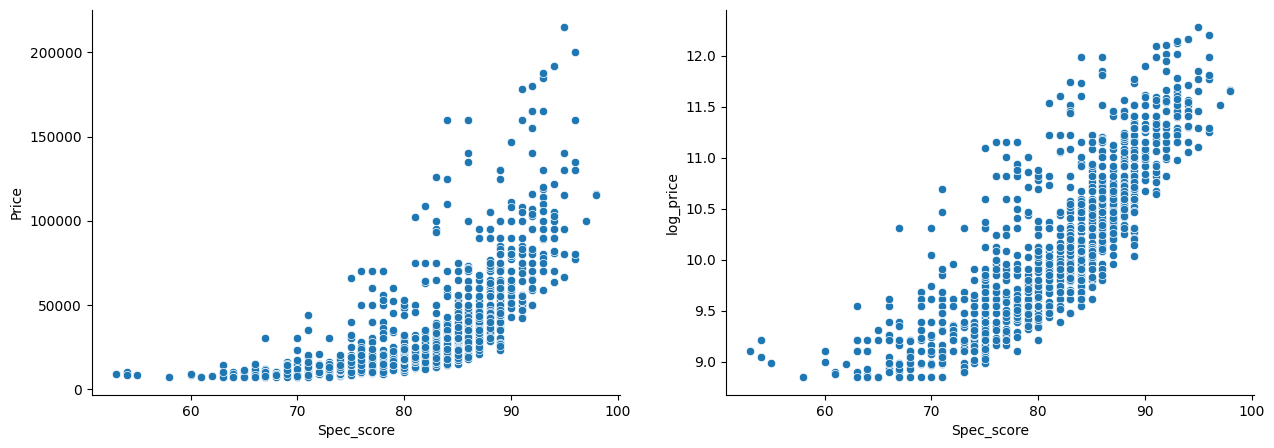

In [46]:
f, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.despine(f)
sns.scatterplot(data=data8, x='Spec_score', y='Price', ax=axs[0])
sns.scatterplot(data=data8, x='Spec_score', y='log_price', ax=axs[1])


In [47]:
# Checking the multicollinearity with the 'statsmodel'
# sklearn does not have a way to check for multicollinearity because it is a statistical issue not an ML issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
# we will take only the numercial variables
variables = data8.drop(['Price','company','Display','Battery','Rating','Ram','Processor','log_price'], axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,5.238606,Spec_score
1,4.634313,Inbuilt_memory
2,3.832420,fast_charging
